In [4]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [5]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

### beta peak

In [3]:
# mean of con. and ips. best ch. 
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_ECOG_CON["r2_con"], axis=1)), \
                np.expand_dims(df_best_ECOG_IPS["r2_ips"], axis=1)), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_ECOG)
results = model.fit()
print(results.summary())

rho_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[0], 2)
#p_val_ECOG = np.round(results.pvalues["b_peak"],3)
p_val_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[1], 2)

df_here_STN = df_best_STN_CON
df_here_STN["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_STN_CON["r2_con"], axis=1)), \
                np.expand_dims(df_best_STN_IPS["r2_ips"], axis=1)), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_STN)
results = model.fit()
print(results.summary())

rho_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[0], 2)
#p_val_STN = np.round(results.pvalues["b_peak"],3)
p_val_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[1], 2)

                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     9.168
Date:                Fri, 23 Oct 2020   Prob (F-statistic):            0.00904
Time:                        12:42:19   Log-Likelihood:                 9.4611
No. Observations:                  16   AIC:                            -14.92
Df Residuals:                      14   BIC:                            -13.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0949      0.109     -0.875      0.3

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


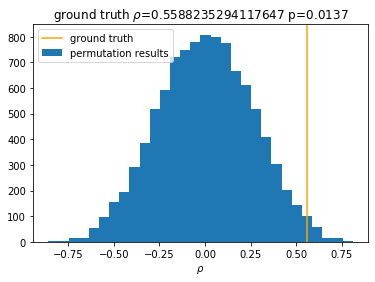

In [6]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_here_ECOG["r2"], df_here_ECOG["b_peak"], True,r"$\rho$", 10000)

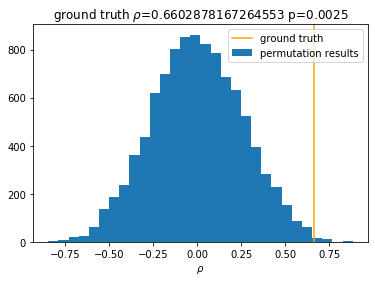

In [7]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_here_STN["r2"], df_here_STN["b_peak"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. best performances\nECOG $\\rho$=0.56 p=0.0137\nSTN $\\rho$=0.66 p=0.0025\nSum of Beta Peaks No Movement periodic fit\n ')

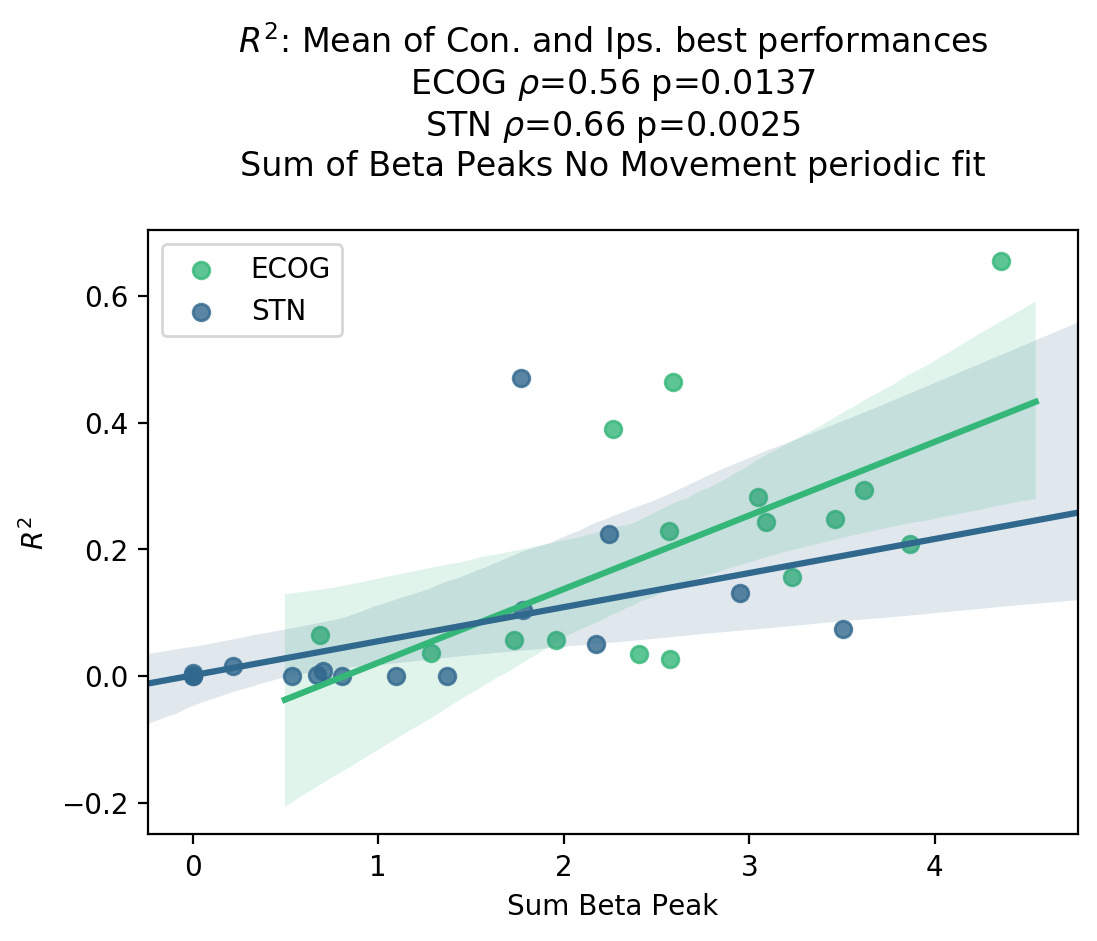

In [9]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="b_peak", y="r2", data=df_here_ECOG, label="ECOG", color=(53/255,183/255,121/255))
sns.regplot(x="b_peak", y="r2", data=df_here_STN, label="STN", color=(49/255,104/255,142/255))
plt.legend()
plt.xlabel("Sum Beta Peak")
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. best performances\n"+
          "ECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+\
          "\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN)+\
          "\nSum of Beta Peaks No Movement periodic fit\n ")

### UPDRS Upper Rigidity Correlation

In [10]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()

SpearmanrResult(correlation=-0.6131617779732899, pvalue=0.04485069721774724)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     9.459
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0132
Time:                        12:55:21   Log-Likelihood:                 10.938
No. Observations:                  11   AIC:                            -17.88
Df Residuals:                       9   BIC:                            -17.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [11]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.657241060772843, pvalue=0.027988158732147477)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     7.960
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0200
Time:                        12:55:32   Log-Likelihood:                 14.232
No. Observations:                  11   AIC:                            -24.46
Df Residuals:                       9   BIC:                            -23.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

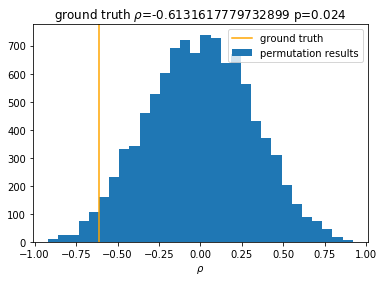

In [13]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_comp_ECOG["r2"], df_comp_ECOG["pred"], True,r"$\rho$", 10000)

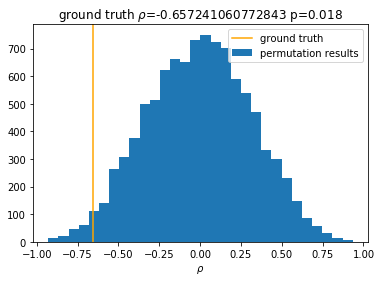

In [14]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_comp_STN["r2"], df_comp_STN["pred"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n $R^2$: Mean of Con. and Ips. mean performances \nECOG: $\\rho$=-0.61 p=0.024 STN: $\\rho$=-0.66 p=0.018')

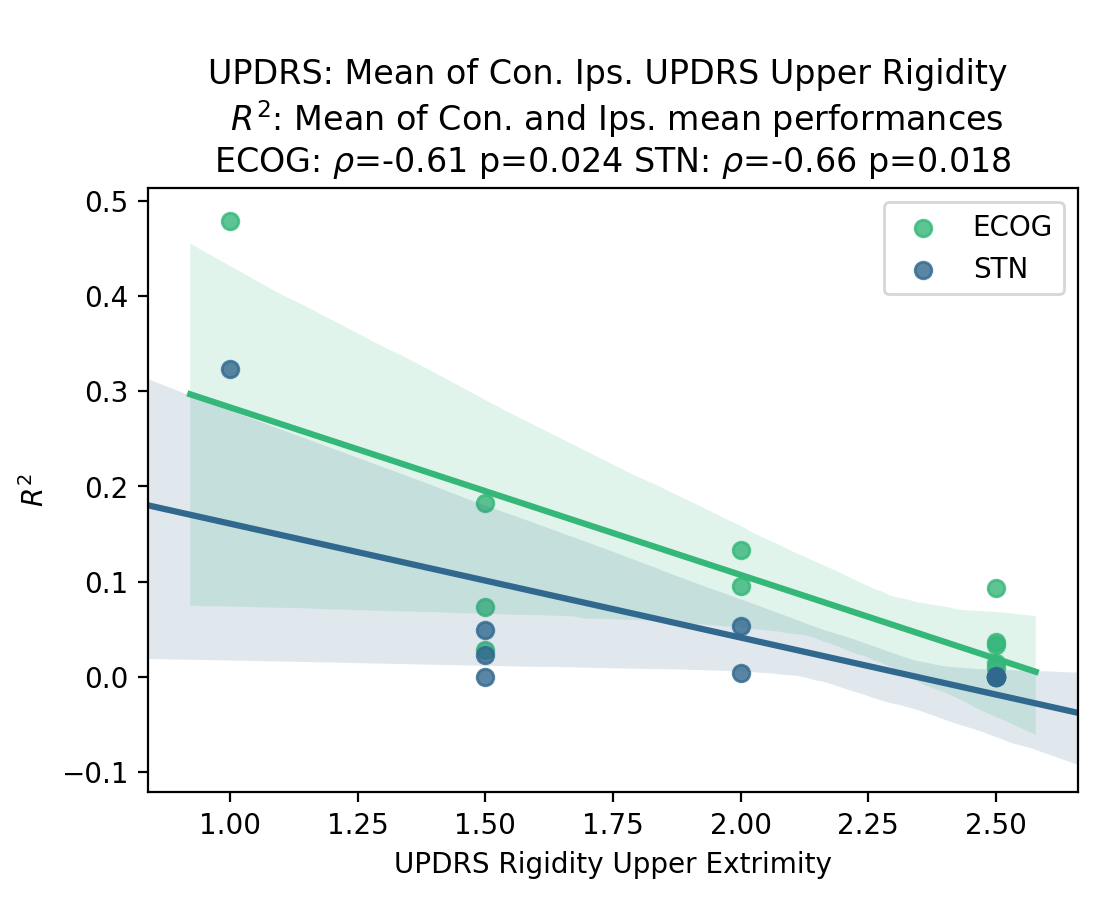

In [15]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS Rigidity Upper Extrimity")
plt.ylabel(r"$R^2$")
plt.title("\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p=" +str(p_val_ECOG)+\
          " STN: "r"$\rho$"+"="+str(np.round(rho_STN,2))+" p=" +str(p_val_STN))

### UPDRS total

In [16]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
    
print(stats.spearmanr(per_, pred_))
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.arctanh(np.array(per_))
df_comp_ECOG["pred"] = pred_
model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.255
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.105
Time:                        12:59:42   Log-Likelihood:                 7.7461
No. Observations:                  11   AIC:                            -11.49
Df Residuals:                       9   BIC:                            -10.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [17]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5525691640126262, pvalue=0.07793082878582444)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.170
Time:                        12:59:45   Log-Likelihood:                 11.964
No. Observations:                  11   AIC:                            -19.93
Df Residuals:                       9   BIC:                            -19.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

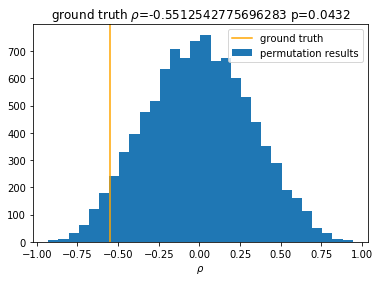

In [18]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_comp_ECOG["r2"], df_comp_ECOG["pred"], True,r"$\rho$", 10000)

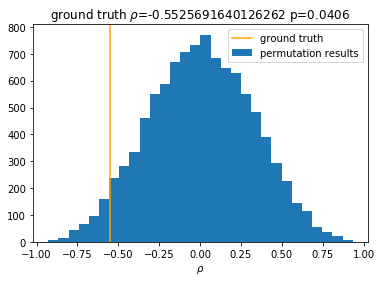

In [19]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_comp_STN["r2"], df_comp_STN["pred"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. mean performances \nECOG: $\\rho$=-0.55 p=0.0432 STN: $\\rho$=-0.55 p=0.0406')

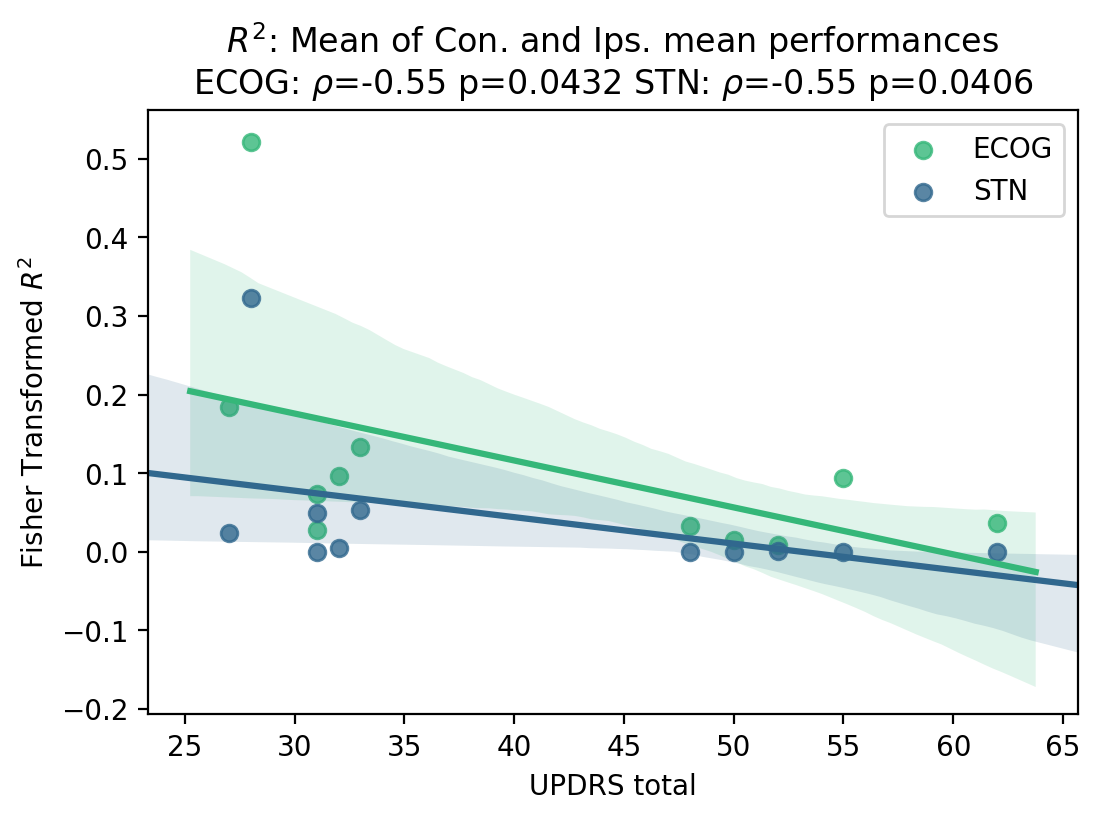

In [20]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p=" +str(p_val_ECOG)+\
          " STN: "r"$\rho$"+"="+str(np.round(rho_STN,2))+" p=" +str(p_val_STN))

### combine ECOG and STN 

In [21]:
df_here_STN = df_all[df_all["loc"].str.contains("STN")]
df_here_ECOG = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here_ECOG[df_here_ECOG["sub"] == sub_]["r2_con"], \
                               df_here_ECOG[df_here_ECOG["sub"] == sub_]["r2_ips"], 
                         df_here_STN[df_here_STN["sub"] == sub_]["r2_con"], \
                               df_here_STN[df_here_STN["sub"] == sub_]["r2_ips"])).mean())

    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 


df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.6104799437547951, pvalue=0.046060398811002226)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.170
Time:                        13:00:47   Log-Likelihood:                 11.964
No. Observations:                  11   AIC:                            -19.93
Df Residuals:                       9   BIC:                            -19.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

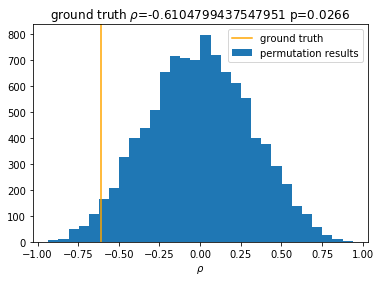

In [22]:
rho_, p_val_ = icn_permutation_test.permutationTestSpearmansRho(df_comp["r2"], df_comp["pred"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. mean performances \nECOG and STN combined: $\\rho$=-0.61 p=0.0266')

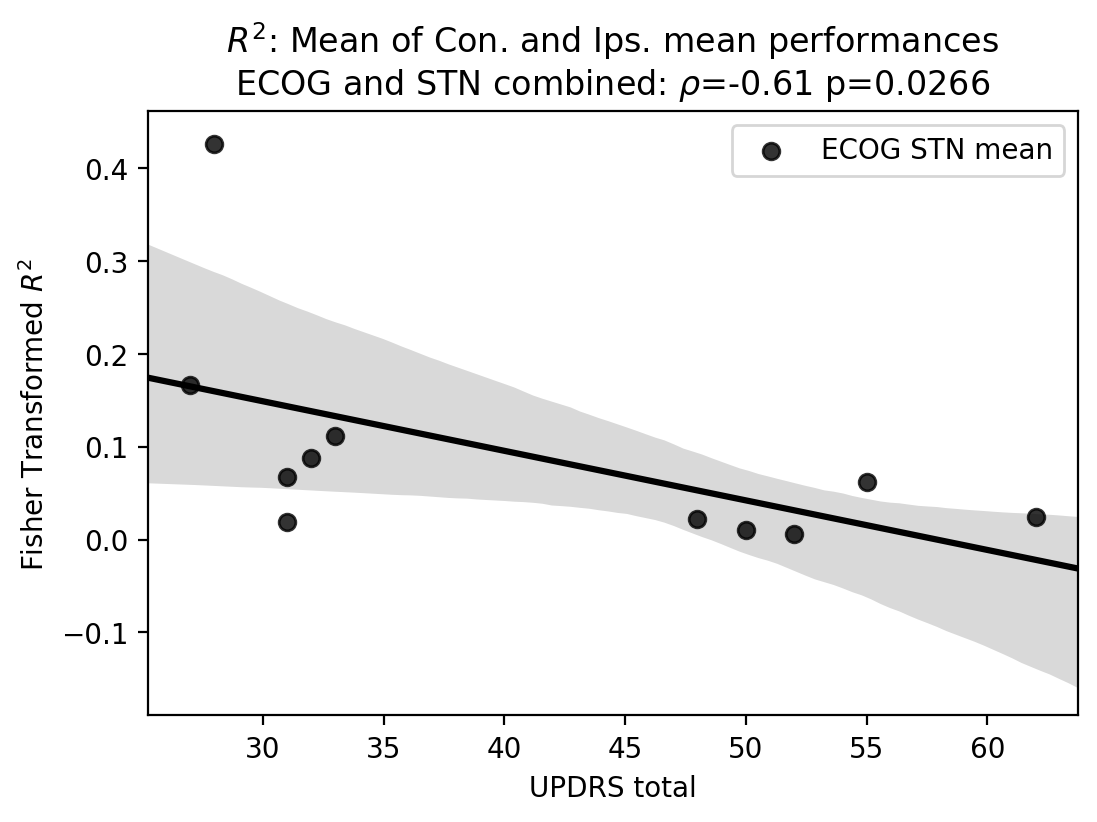

In [24]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp, color="black", label="ECOG STN mean")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG and STN combined: "+ r"$\rho$"+"="+str(np.round(rho_,2))+" p=" +str(p_val_))

### Statistical tests between methods (Figure 3)

In [6]:
import math
PATH = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\MOVEMENT DATA\\ECoG_STN\\NN_Out_NOCV\\"
patients = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']
PATH_BASE = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\ECoG_STN\\"

In [7]:
def get_res(PATH_, all_=True, best_Tr=False, SPOC_ = False, log_=False):
    """
    Given the resp. Path for LM/XGB/NN based on single channel estimaton; 
    return rather all, oder just the best CV test or test(best train) performances 
    returns dict(ECOG CON, ECOG IPS; STN CON, STN IPS)
    """
    res_files = os.listdir(PATH_)
    res_ = {}; # ECOG CON, ECOG IPS; STN CON, STN IPS
    for loc in ["ECOG", "STN"]:
        for lat in ["CON", "IPS"]:
            patients_ = []
            for sub in subjects:
                files = [f for f in res_files if (sub in f) and (loc in f)]
                max_ = []; tr_ = []; te_ = []
                for file in files: # Sess right or left
                    
                    if log_ is True: print(file)
                    if all_ is True:
                        max_.append(np.load(os.path.join(PATH_, file), 
                                               allow_pickle=True).tolist()["score_te"][lat])
                    else:
                        if SPOC_ is False:
                            max_.append(np.max(np.load(os.path.join(PATH_, file), 
                                               allow_pickle=True).tolist()["score_te"][lat]))
                            tr_.append(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_tr"][lat])
                            te_.append(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_te"][lat])

                        else:
                            max_.append(np.mean(np.load(os.path.join(PATH_, file), 
                                               allow_pickle=True).tolist()["score_te"][lat]))
                            tr_.append(np.mean(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_tr"][lat]))
                            te_.append(np.mean(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_te"][lat]))

                if all_ is True: 
                    patients_.append(np.concatenate(max_).ravel())
                else:
                    if best_Tr is True:
                        if SPOC_ is False:
                            patients_.append(np.concatenate(te_).ravel()[np.argmax(np.concatenate(tr_).ravel())])
                        else:
                            patients_.append(np.ravel(te_)[np.argmax(np.ravel(tr_))])
                    else:
                        patients_.append(np.max(max_))
            res_[loc+"_"+lat] = np.concatenate(patients_).ravel() if all_ is True else patients_
    return res_

In [8]:
res_here = []
for loc in ["ECOG", "STN"]:
    for lat in ["CON", "IPS"]:
        sc_p = []
        for sub in patients:
            sc_ = []
            files = [f for f in os.listdir(PATH) if sub in f and lat in f and loc in f]
            for f in files:
                res = np.load(os.path.join(PATH, f), allow_pickle=True)
                try:
                    if math.isnan(res.tolist()["score_te"]):
                        sc_.append(0)
                    else:
                        sc_.append(res.tolist()["score_te"])
                except:
                    sc_.append(0)
            try:
                sc_p.append(np.max(sc_))
            except:
                sc_p.append(0)
        res_here.append(sc_p)

res_NN = {
    "ECOG_CON": res_here[0],
    "ECOG_IPS": res_here[1],
    "STN_CON": res_here[2],
    "STN_IPS": res_here[3]
}

In [9]:
res_XGB =  get_res(os.path.join(PATH_BASE, "XGB_Out"), all_=False, best_Tr=False, log_=False, SPOC_=False)
res_LM =  get_res(os.path.join(PATH_BASE, "LM_Out"), all_=False, best_Tr=False, log_=False, SPOC_=False)
res_SPOC_LM = get_res(os.path.join(PATH_BASE, "LM_Out_SPoC"), all_=False, best_Tr=False, log_=False, SPOC_=True)
res_SPOC_XGB = get_res(os.path.join(PATH_BASE, "XGB_Out_SPoC"), all_=False, best_Tr=False, log_=False, SPOC_=True)


C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
print(str(np.mean(res_XGB["ECOG_CON"])) + " " +str(np.std(res_XGB["ECOG_CON"])))

0.3062255774213281 0.22569944787098759


In [11]:
print(str(np.mean(res_XGB["ECOG_IPS"])) + " " +str(np.std(res_XGB["ECOG_IPS"])))

0.13464740966699165 0.14794545907331477


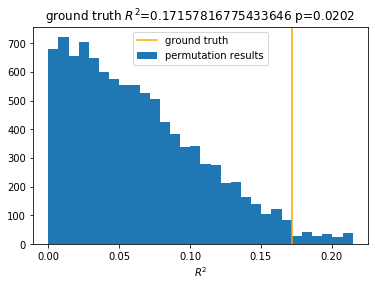

(0.17157816775433646, 0.0202)

In [15]:
icn_permutation_test.permutationTest_relative(np.array(res_XGB["ECOG_CON"]), 
                                              np.array(res_XGB["ECOG_IPS"]), True, r"$R^2$", 10000)

In [16]:
df = pd.read_pickle("XGB_performances_LMWFNNSPOCSPOCXGB.p")

In [19]:
df[(df["method"] == "LM") & (df["lat"] == "CON") & (df["loc"] == "ECOG")][r"$R^2$"].mean()

0.1455559896402608

In [20]:
df[(df["method"] == "LM") & (df["lat"] == "CON") & (df["loc"] == "ECOG")][r"$R^2$"].std()

0.10407254646361802

In [21]:
df[(df["method"] == "LM") & (df["lat"] == "IPS") & (df["loc"] == "ECOG")][r"$R^2$"].mean()

0.0619148711059715

In [23]:
df[(df["method"] == "LM") & (df["lat"] == "IPS") & (df["loc"] == "ECOG")][r"$R^2$"].std()

0.0428500406740396

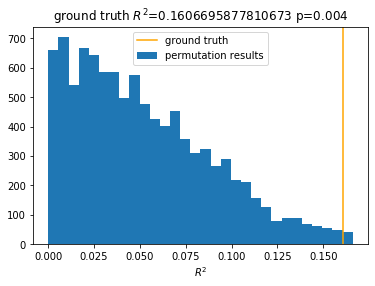

(0.1606695877810673, 0.004)

In [25]:
icn_permutation_test.permutationTest_relative(np.array(res_XGB["ECOG_CON"]), 
        np.array(df[(df["method"] == "LM") & (df["lat"] == "CON") & (df["loc"] == "ECOG")][r"$R^2$"]), 
                                              True, r"$R^2$", 10000)

LM
MEAN: 
0.0619148711059715
STD: 
0.04085591073034874


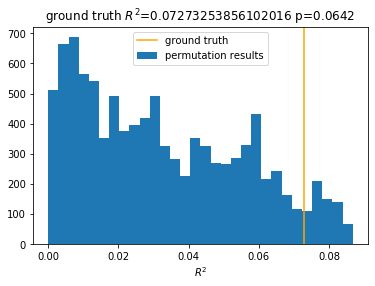

WF
MEAN: 
0.08919986844546668
STD: 
0.06616775195460418


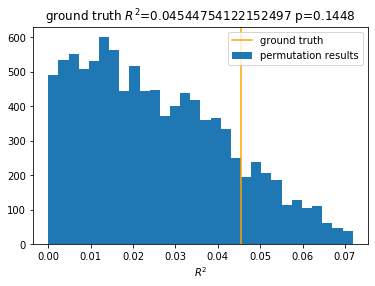

NN
MEAN: 
0.0872178497884035
STD: 
0.19368648268275573


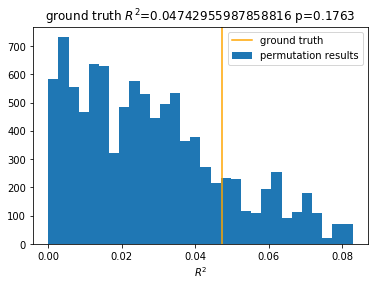

SPOC_LM
MEAN: 
0.08553741166230232
STD: 
0.0735996253394602


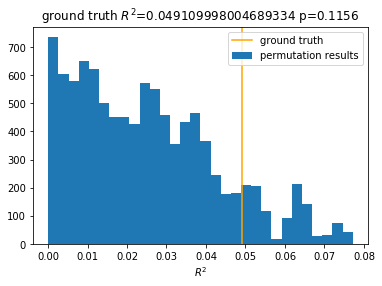

SPOC_XGB
MEAN: 
0.08687018639706694
STD: 
0.1360619816360244


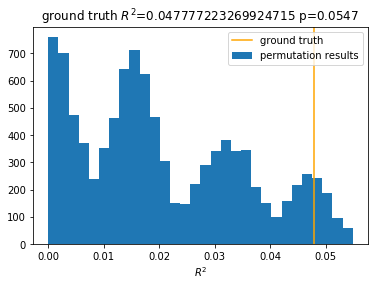

In [28]:
for method in ["LM", "WF", "NN", "SPOC_LM", "SPOC_XGB"]:
    print(method)
    print("MEAN: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "IPS") & (df["loc"] == "ECOG")][r"$R^2$"]).mean())
    print("STD: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "IPS") & (df["loc"] == "ECOG")][r"$R^2$"]).std())
    
    icn_permutation_test.permutationTest_relative(np.array(res_XGB["ECOG_IPS"]), 
            np.array(df[(df["method"] == method) & (df["lat"] == "IPS") & (df["loc"] == "ECOG")][r"$R^2$"]), 
                                                  True, r"$R^2$", 10000)

LM
MEAN: 
0.1455559896402608
STD: 
0.09922927962058346


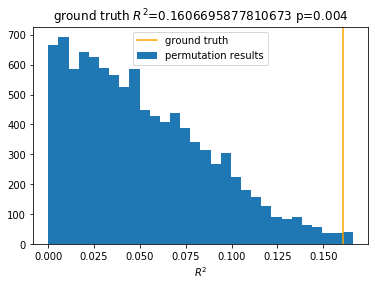

WF
MEAN: 
0.19339097048166007
STD: 
0.12890645572609163


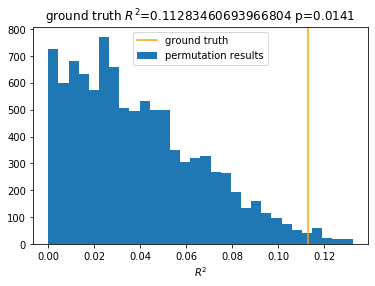

NN
MEAN: 
0.14127488691733173
STD: 
0.24657510416018957


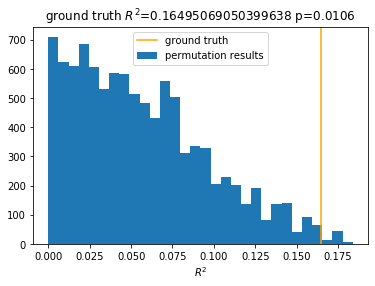

SPOC_LM
MEAN: 
0.16331018602718236
STD: 
0.12137499279867157


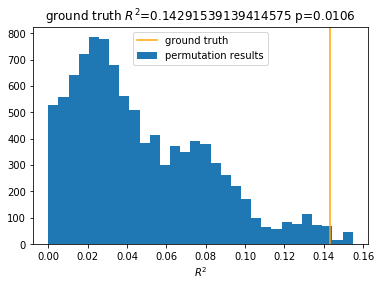

SPOC_XGB
MEAN: 
0.23580613270524028
STD: 
0.20401887146463016


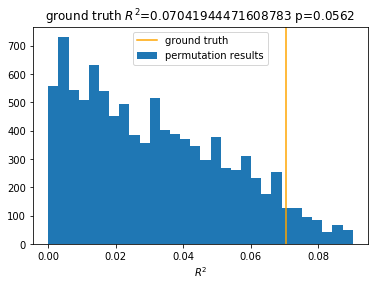

In [30]:
for method in ["LM", "WF", "NN", "SPOC_LM", "SPOC_XGB"]:
    print(method)
    print("MEAN: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "CON") & (df["loc"] == "ECOG")][r"$R^2$"]).mean())
    print("STD: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "CON") & (df["loc"] == "ECOG")][r"$R^2$"]).std())
    
    icn_permutation_test.permutationTest_relative(np.array(res_XGB["ECOG_CON"]), 
            np.array(df[(df["method"] == method) & (df["lat"] == "CON") & (df["loc"] == "ECOG")][r"$R^2$"]), 
                                                  True, r"$R^2$", 10000)

LM
MEAN: 
0.06424366756796757
STD: 
0.10783707757479535


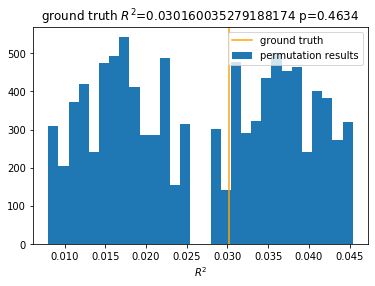

WF
MEAN: 
0.09991290227332715
STD: 
0.16199008922210797


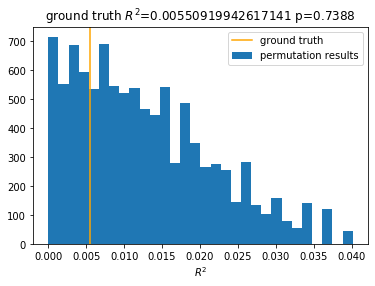

NN
MEAN: 
0.015029542803316072
STD: 
0.04752758744947086


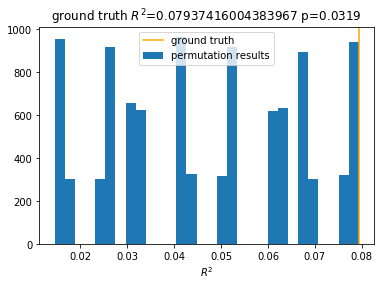

SPOC_LM
MEAN: 
0.09268271284950312
STD: 
0.16112107268840872


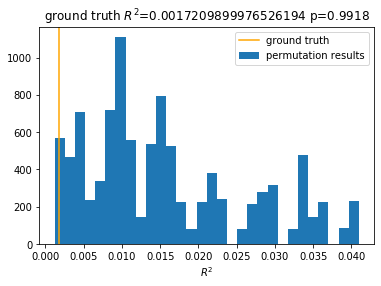

SPOC_XGB
MEAN: 
0.09392647936616595
STD: 
0.19754935345253813


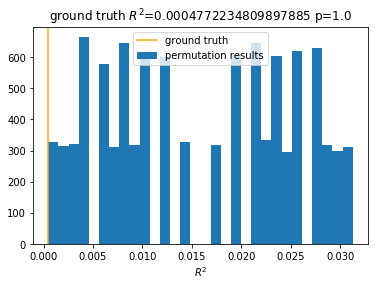

In [32]:
for method in ["LM", "WF", "NN", "SPOC_LM", "SPOC_XGB"]:
    print(method)
    print("MEAN: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "CON") & (df["loc"] == "STN")][r"$R^2$"]).mean())
    print("STD: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "CON") & (df["loc"] == "STN")][r"$R^2$"]).std())
    
    icn_permutation_test.permutationTest_relative(np.array(res_XGB["STN_CON"]), 
            np.array(df[(df["method"] == method) & (df["lat"] == "CON") & (df["loc"] == "STN")][r"$R^2$"]), 
                                                  True, r"$R^2$", 10000)

LM
MEAN: 
0.03533110465793154
STD: 
0.0355501489498942


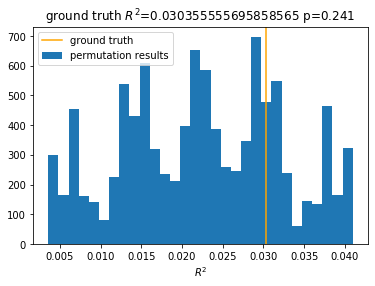

WF
MEAN: 
0.06725381823885797
STD: 
0.08754199774827508


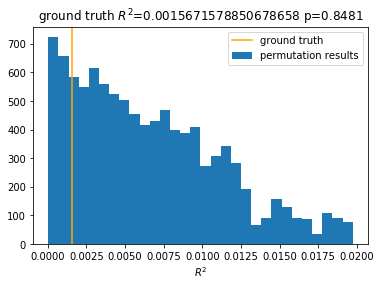

NN
MEAN: 
0.0
STD: 
0.0


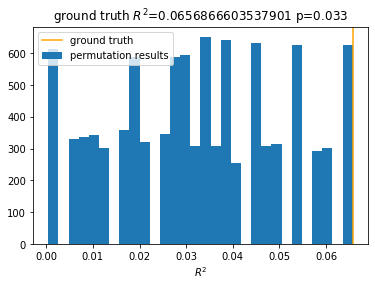

SPOC_LM
MEAN: 
0.05466282118395427
STD: 
0.06885771060461787


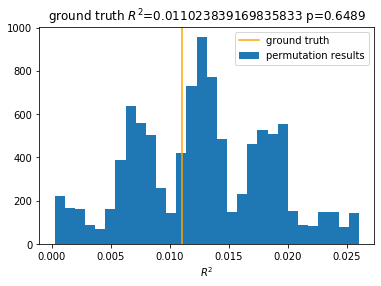

SPOC_XGB
MEAN: 
0.05388534778350857
STD: 
0.11786850570671417


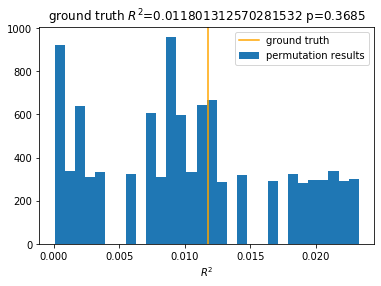

In [31]:
for method in ["LM", "WF", "NN", "SPOC_LM", "SPOC_XGB"]:
    print(method)
    print("MEAN: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "IPS") & (df["loc"] == "STN")][r"$R^2$"]).mean())
    print("STD: ")
    print(np.array(df[(df["method"] == method) & (df["lat"] == "IPS") & (df["loc"] == "STN")][r"$R^2$"]).std())
    
    icn_permutation_test.permutationTest_relative(np.array(res_XGB["STN_IPS"]), 
            np.array(df[(df["method"] == method) & (df["lat"] == "IPS") & (df["loc"] == "STN")][r"$R^2$"]), 
                                                  True, r"$R^2$", 10000)

0.19339097048166007 0.12890645572609163


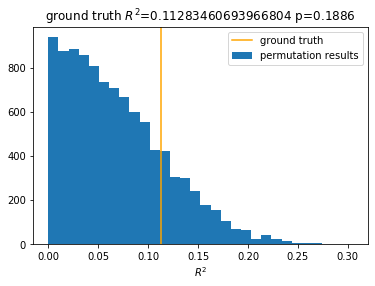

(0.11283460693966804, 0.1886)

In [59]:
# LM 
print(str(np.mean(res_LM["ECOG_CON"])) + " " +str(np.std(res_LM["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_LM["ECOG_CON"], True, r"$R^2$", 10000)

0.08919986844546668 0.06616775195460418


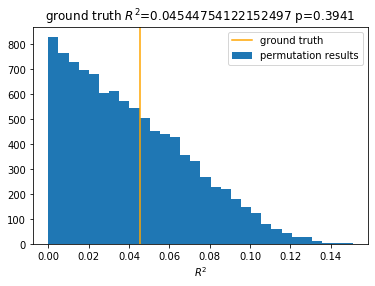

(0.04544754122152497, 0.3941)

In [60]:
# LM 
print(str(np.mean(res_LM["ECOG_IPS"])) + " " +str(np.std(res_LM["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_LM["ECOG_IPS"], True, r"$R^2$", 10000)

0.14127488691733173 0.24657510416018957


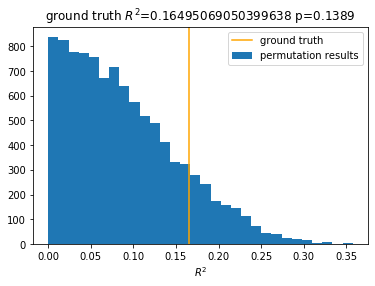

(0.16495069050399638, 0.1389)

In [55]:
# NN 
print(str(np.mean(res_NN["ECOG_CON"])) + " " +str(np.std(res_NN["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_NN["ECOG_CON"], True, r"$R^2$", 10000)

0.0872178497884035 0.19368648268275573


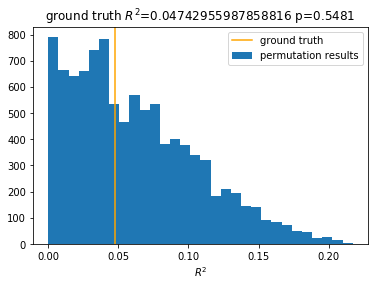

(0.04742955987858816, 0.5481)

In [61]:
# NN 
print(str(np.mean(res_NN["ECOG_IPS"])) + " " +str(np.std(res_NN["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_NN["ECOG_IPS"], True, r"$R^2$", 10000)

0.16331018602718236 0.12137499279867157


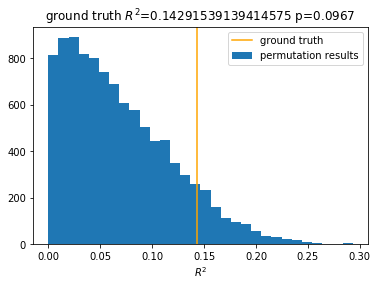

(0.14291539139414575, 0.0967)

In [56]:
# SPOC LM 
print(str(np.mean(res_SPOC_LM["ECOG_CON"])) + " " +str(np.std(res_SPOC_LM["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_SPOC_LM["ECOG_CON"], True, r"$R^2$", 10000)

0.08553741166230232 0.0735996253394602


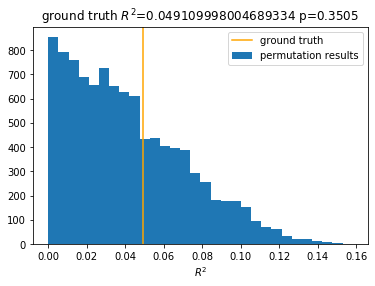

(0.049109998004689334, 0.3505)

In [62]:
# SPOC LM 
print(str(np.mean(res_SPOC_LM["ECOG_IPS"])) + " " +str(np.std(res_SPOC_LM["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_SPOC_LM["ECOG_IPS"], True, r"$R^2$", 10000)

0.23580613270524028 0.20401887146463016


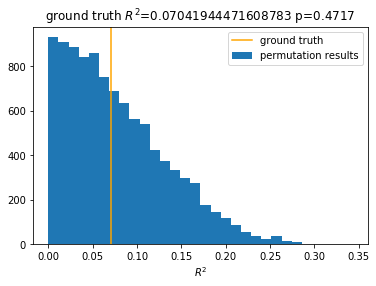

(0.07041944471608783, 0.4717)

In [58]:
# SPOC XGB 
print(str(np.mean(res_SPOC_XGB["ECOG_CON"])) + " " +str(np.std(res_SPOC_XGB["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_SPOC_XGB["ECOG_CON"], True, r"$R^2$", 10000)

0.08687018639706694 0.1360619816360244


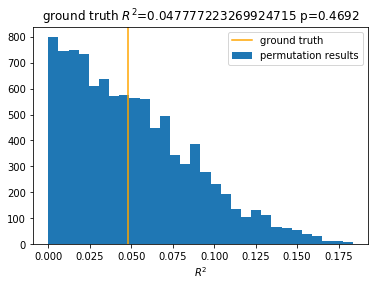

(0.047777223269924715, 0.4692)

In [63]:
# SPOC XGB 
print(str(np.mean(res_SPOC_XGB["ECOG_IPS"])) + " " +str(np.std(res_SPOC_XGB["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_SPOC_XGB["ECOG_IPS"], True, r"$R^2$", 10000)

### STN 

In [67]:
# LM 
print(str(np.mean(res_LM["STN_CON"])) + " " +str(np.std(res_LM["STN_CON"])))


0.09991290227332715 0.16199008922210797


In [71]:
print(str(np.mean(res_LM["STN_IPS"])) + " " +str(np.std(res_LM["STN_IPS"])))


0.06725381823885797 0.08754199774827508


In [68]:
print(str(np.mean(res_NN["STN_CON"])) + " " +str(np.std(res_NN["STN_CON"])))

0.015029542803316072 0.04752758744947086


In [72]:
print(str(np.mean(res_NN["STN_IPS"])) + " " +str(np.std(res_NN["STN_IPS"])))

0.0 0.0


In [69]:
print(str(np.mean(res_SPOC_LM["STN_CON"])) + " " +str(np.std(res_SPOC_LM["STN_CON"])))

0.09268271284950312 0.16112107268840872


In [73]:
print(str(np.mean(res_SPOC_LM["STN_IPS"])) + " " +str(np.std(res_SPOC_LM["STN_IPS"])))

0.05466282118395427 0.06885771060461787


In [70]:
print(str(np.mean(res_SPOC_XGB["STN_CON"])) + " " +str(np.std(res_SPOC_XGB["STN_CON"])))

0.09392647936616595 0.19754935345253813


In [74]:
print(str(np.mean(res_SPOC_XGB["STN_IPS"])) + " " +str(np.std(res_SPOC_XGB["STN_IPS"])))

0.05388534778350857 0.11786850570671417


In [76]:
print(str(np.mean(res_XGB["STN_CON"])) + " " +str(np.std(res_XGB["STN_CON"])))

0.09440370284715574 0.1947417800267217


In [75]:
print(str(np.mean(res_XGB["STN_IPS"])) + " " +str(np.std(res_XGB["STN_IPS"])))

0.0656866603537901 0.10496066674680594


0.3062255774213281 0.1947417800267217


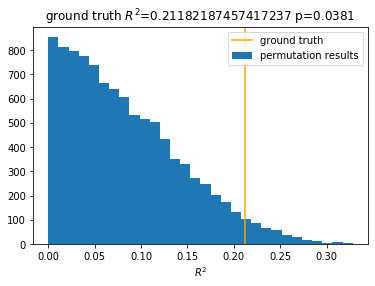

(0.21182187457417237, 0.0381)

In [77]:
# ECOG vs STN
print(str(np.mean(res_XGB["ECOG_CON"])) + " " +str(np.std(res_XGB["STN_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB["STN_CON"], True, r"$R^2$", 10000)

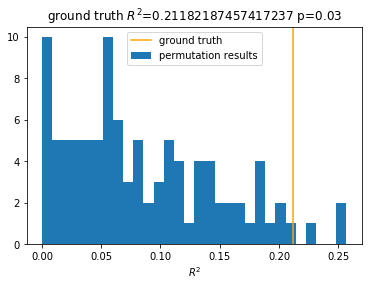

(0.21182187457417237, 0.03)

In [81]:
# ECOG vs STN
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB["STN_CON"], True, r"$R^2$", 100)

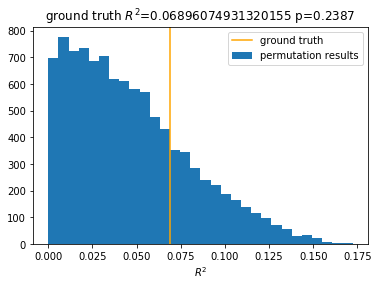

(0.06896074931320155, 0.2387)

In [84]:
# ECOG vs STN
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_XGB["STN_IPS"], True, r"$R^2$", 10000)

In [83]:
stats.ranksums(res_XGB["ECOG_IPS"], res_XGB["STN_IPS"])

RanksumsResult(statistic=1.805787796286538, pvalue=0.07095149242730558)

### show diff with test(best train)

In [85]:
res_XGB_t =  get_res(os.path.join(PATH_BASE, "XGB_Out"), all_=False, best_Tr=True, log_=False, SPOC_=False)
res_LM_t =  get_res(os.path.join(PATH_BASE, "LM_Out"), all_=False, best_Tr=True, log_=False, SPOC_=False)
res_SPOC_LM_t = get_res(os.path.join(PATH_BASE, "LM_Out_SPoC"), all_=False, best_Tr=True, log_=False, SPOC_=True)
res_SPOC_XGB_t = get_res(os.path.join(PATH_BASE, "XGB_Out_SPoC"), all_=False, best_Tr=True, log_=False, SPOC_=True)


C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0.29017170324586156 0.20909916400285442


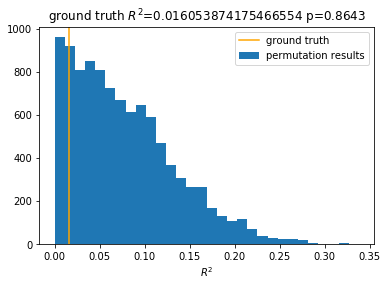

(0.016053874175466554, 0.8643)

In [87]:
# ECOG vs STN
print(str(np.mean(res_XGB_t["ECOG_CON"])) + " " +str(np.std(res_XGB_t["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB_t["ECOG_CON"], True, r"$R^2$", 10000)

0.12334258439713128 0.1521443198019889


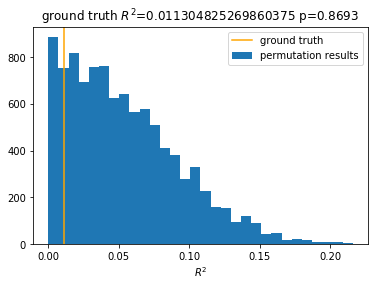

(0.011304825269860375, 0.8693)

In [88]:
# ECOG vs STN
print(str(np.mean(res_XGB_t["ECOG_IPS"])) + " " +str(np.std(res_XGB_t["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_XGB_t["ECOG_IPS"], True, r"$R^2$", 10000)

0.09354379524871184 0.19513545171967278


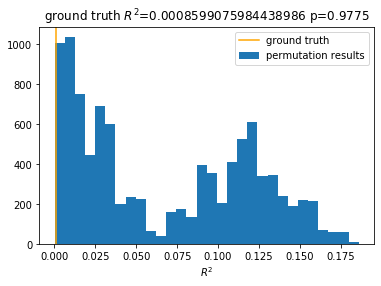

(0.0008599075984438986, 0.9775)

In [89]:
print(str(np.mean(res_XGB_t["STN_CON"])) + " " +str(np.std(res_XGB_t["STN_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["STN_CON"], res_XGB_t["STN_CON"], True, r"$R^2$", 10000)

0.0656866603537901 0.10496066674680594


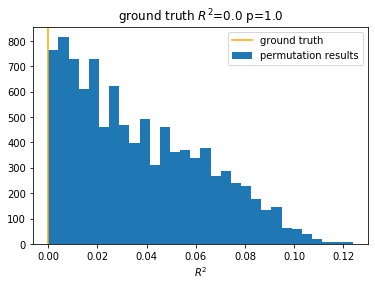

(0.0, 1.0)

In [90]:
print(str(np.mean(res_XGB_t["STN_IPS"])) + " " +str(np.std(res_XGB_t["STN_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["STN_IPS"], res_XGB_t["STN_IPS"], True, r"$R^2$", 10000)

### stat. correlation with number of movements

In [33]:
movs = [128, 464, 213, 285, 381, 84, 161, 131, 547, 86, 205]

In [52]:
df_mov_comp = pd.DataFrame()
df_mov_comp["movs"] = movs
df_mov_comp["XGB_r2_con"] = res_XGB["ECOG_CON"]
df_mov_comp["XGB_r2_ips"] = res_XGB["ECOG_IPS"]
df_mov_comp["XGB_Mean"] = np.array([res_XGB["ECOG_CON"], res_XGB["ECOG_IPS"]]).mean(axis=0)

df_mov_comp["LM_r2_con"] = res_LM["ECOG_CON"]
df_mov_comp["LM_r2_ips"] = res_LM["ECOG_IPS"]
df_mov_comp["LM_Mean"] = np.array([res_LM["ECOG_CON"], res_LM["ECOG_IPS"]]).mean(axis=0)

df_mov_comp["NN_r2_con"] = res_NN["ECOG_CON"]
df_mov_comp["NN_r2_ips"] = res_NN["ECOG_IPS"]
df_mov_comp["NN_Mean"] = np.array([res_NN["ECOG_CON"], res_NN["ECOG_IPS"]]).mean(axis=0)

df_mov_comp["SPOCLM_r2_con"] = res_SPOC_LM["ECOG_CON"]
df_mov_comp["SPOCLM_r2_ips"] = res_SPOC_LM["ECOG_IPS"]
df_mov_comp["SPOCLM_Mean"] = np.array([res_SPOC_LM["ECOG_CON"], res_SPOC_LM["ECOG_IPS"]]).mean(axis=0)

df_mov_comp["SPOCXGB_r2_con"] = res_SPOC_XGB["ECOG_CON"]
df_mov_comp["SPOCXGB_r2_ips"] = res_SPOC_XGB["ECOG_IPS"]
df_mov_comp["SPOCXGB_Mean"] = np.array([res_SPOC_XGB["ECOG_CON"], res_SPOC_XGB["ECOG_IPS"]]).mean(axis=0)

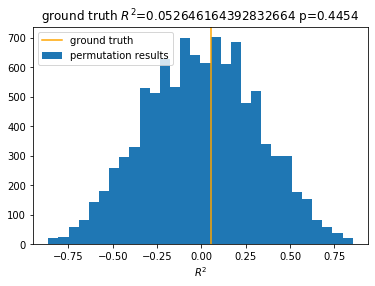

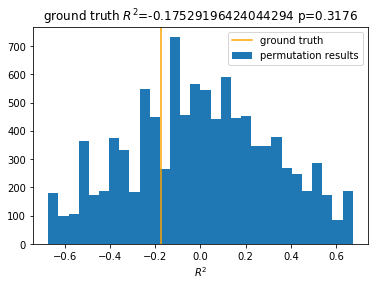

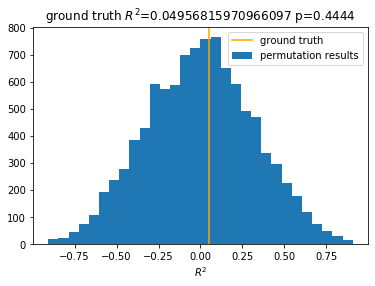

(0.04956815970966097, 0.4444)

In [59]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["NN_r2_con"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["NN_r2_ips"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["NN_Mean"], True, r"$R^2$", 10000)

Text(0.5, 1.0, 'Correlation of NN $R^2$ performances and number of movements\nECOG Con: $\\rho$=0.05 p=0.08\nECOG IPS: $\\rho$=-0.17, p=0.32\nMean ECOG Con and Ips: $\\rho$=0.44, p=0.44')

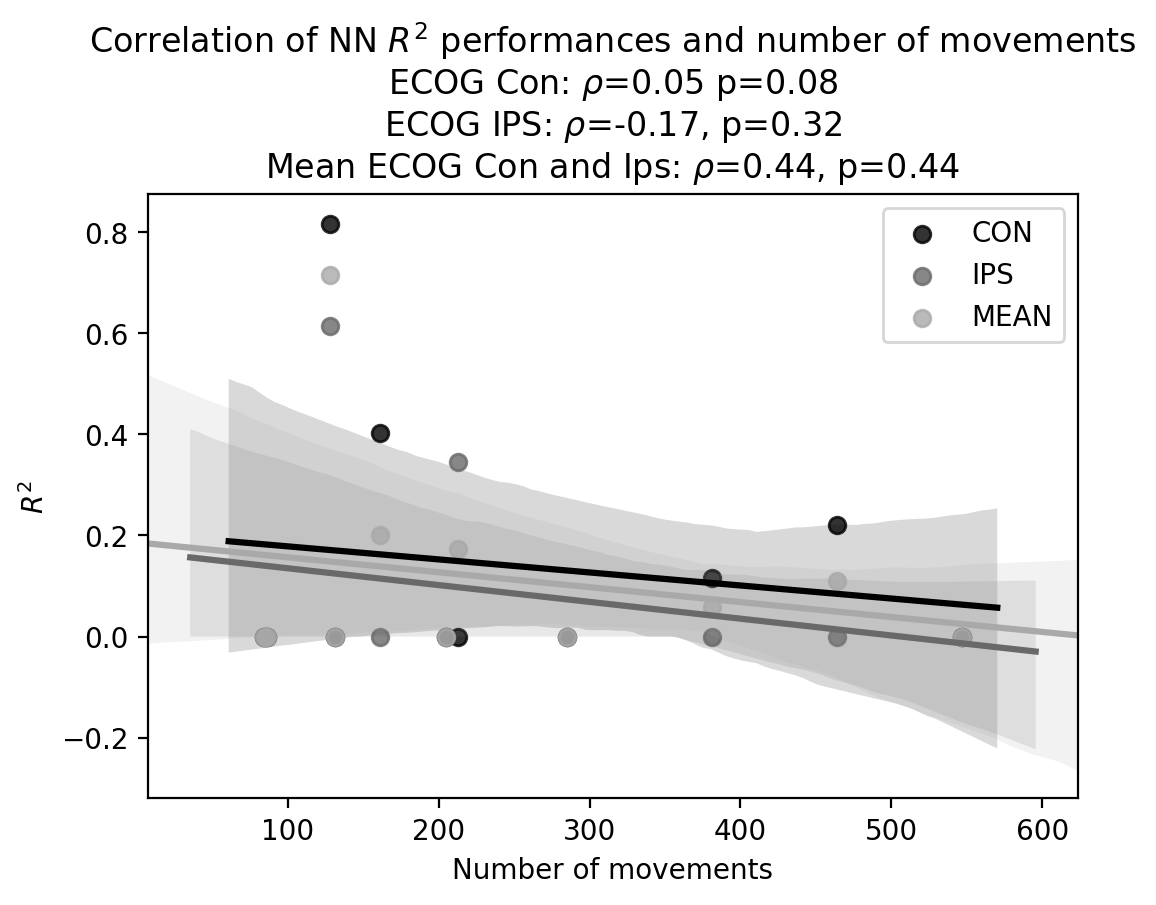

In [61]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="NN_r2_con", data=df_mov_comp, color="black", label="CON")
sns.regplot(x="movs", y="NN_r2_ips", data=df_mov_comp, color="dimgrey", label="IPS")
sns.regplot(x="movs", y="NN_Mean", data=df_mov_comp, color="darkgray", label="MEAN")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of NN "r"$R^2$"+" performances and number of movements\n"+\
          "ECOG Con: "+r"$\rho$"+"=0.05 p=0.08" +
          "\nECOG IPS: "+r"$\rho$"+"=-0.17, p=0.32\n"+\
         "Mean ECOG Con and Ips: "+r"$\rho$"+"=0.44, p=0.44")

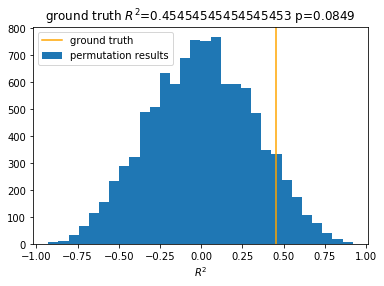

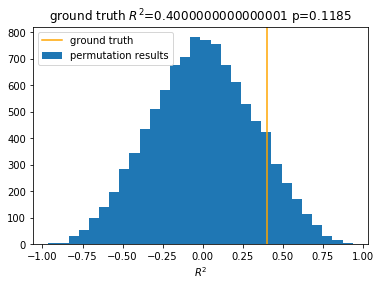

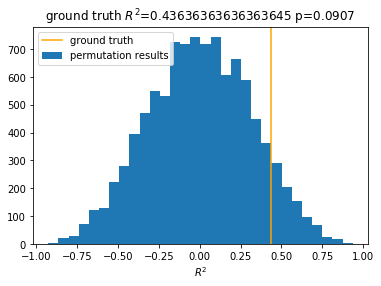

(0.43636363636363645, 0.0907)

In [57]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["XGB_r2_con"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["XGB_r2_ips"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["XGB_Mean"], True, r"$R^2$", 10000)

Text(0.5, 1.0, 'Correlation of XGB $R^2$ performances and number of movements\nECOG Con: $\\rho$=0.45 p=0.08\nECOG IPS: $\\rho$=0.4, p=0.12\nMean ECOG Con and Ips: $\\rho$=0.43, p=0.09')

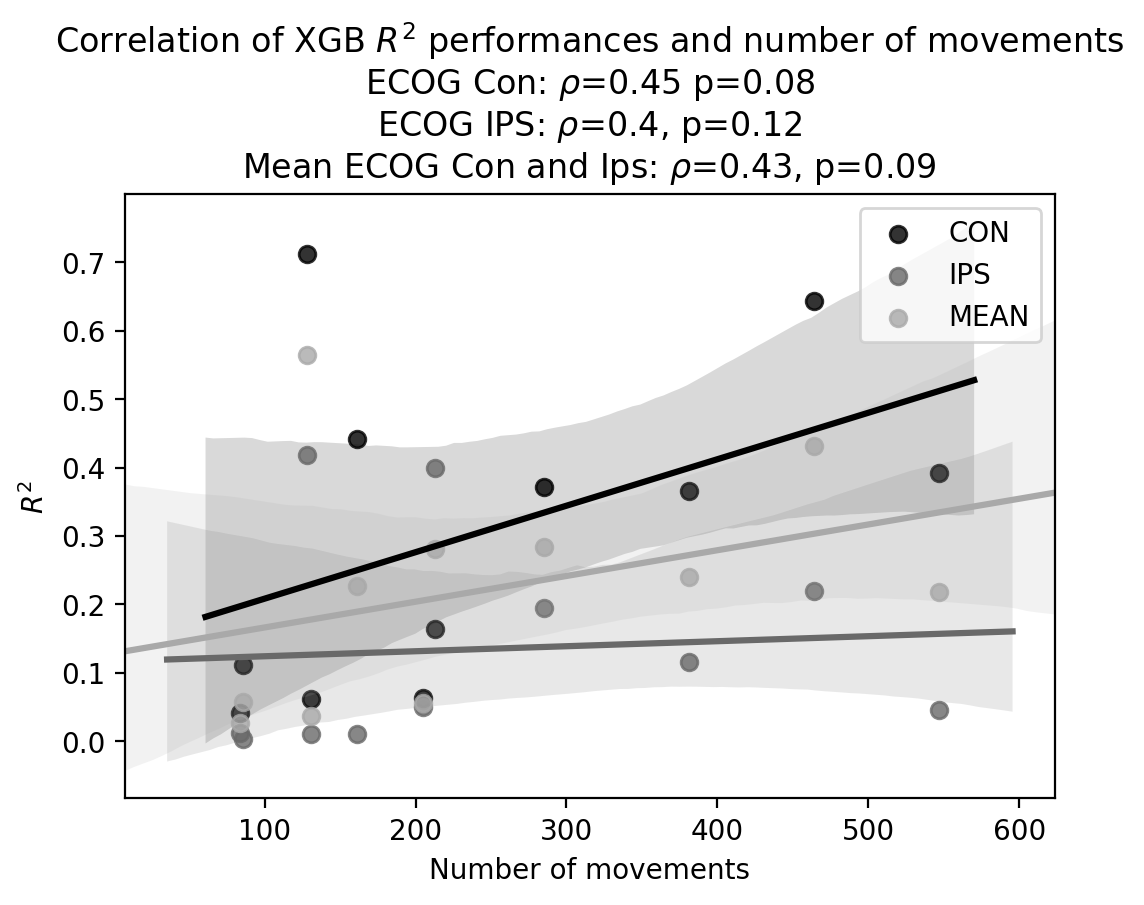

In [62]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="XGB_r2_con", data=df_mov_comp, color="black", label="CON")
sns.regplot(x="movs", y="XGB_r2_ips", data=df_mov_comp, color="dimgrey", label="IPS")
sns.regplot(x="movs", y="XGB_Mean", data=df_mov_comp, color="darkgray", label="MEAN")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of XGB "r"$R^2$"+" performances and number of movements\n"+\
          "ECOG Con: "+r"$\rho$"+"=0.45 p=0.08" +
          "\nECOG IPS: "+r"$\rho$"+"=0.4, p=0.12\n"+\
         "Mean ECOG Con and Ips: "+r"$\rho$"+"=0.43, p=0.09")

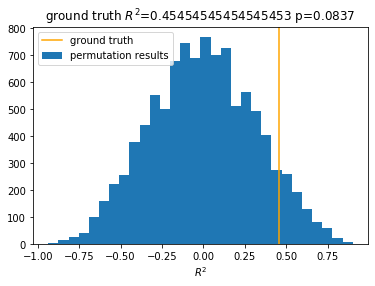

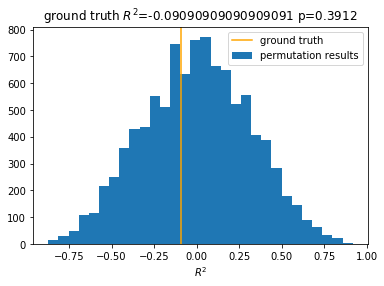

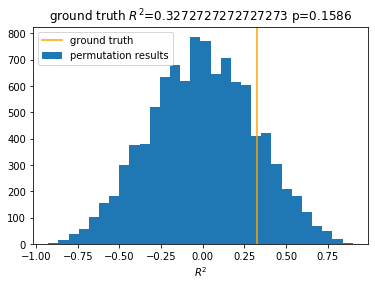

(0.3272727272727273, 0.1586)

In [55]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["SPOCLM_r2_con"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["SPOCLM_r2_ips"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["SPOCLM_Mean"], True, r"$R^2$", 10000)

Text(0.5, 1.0, 'Correlation of SPOC LM $R^2$ performances and number of movements\nECOG Con: $\\rho$=0.45 p=0.08\nECOG IPS: $\\rho$=-0.09, p=0.39\nMean ECOG Con and Ips: $\\rho$=0.32, p=0.16')

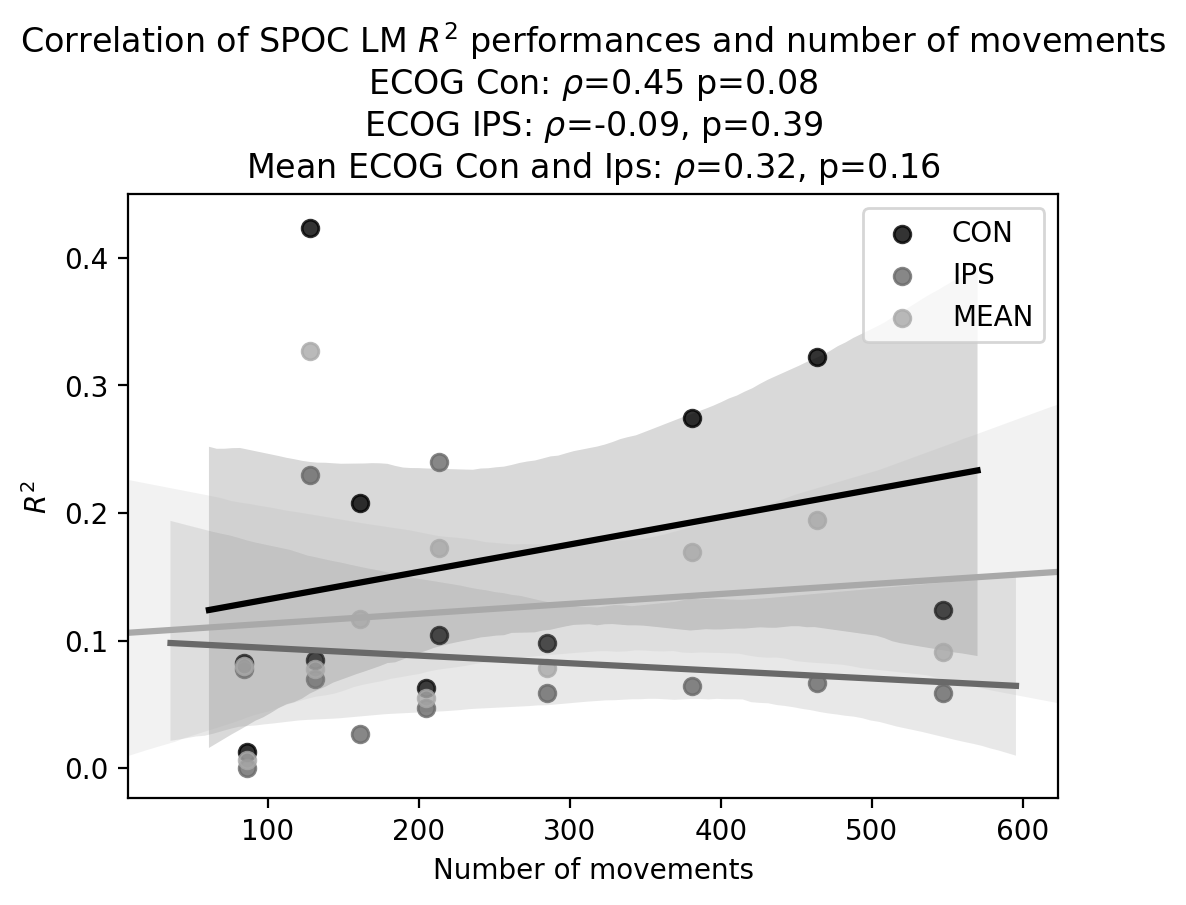

In [56]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="SPOCLM_r2_con", data=df_mov_comp, color="black", label="CON")
sns.regplot(x="movs", y="SPOCLM_r2_ips", data=df_mov_comp, color="dimgrey", label="IPS")
sns.regplot(x="movs", y="SPOCLM_Mean", data=df_mov_comp, color="darkgray", label="MEAN")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of SPOC LM "r"$R^2$"+" performances and number of movements\n"+\
          "ECOG Con: "+r"$\rho$"+"=0.45 p=0.08" +
          "\nECOG IPS: "+r"$\rho$"+"=-0.09, p=0.39\n"+\
         "Mean ECOG Con and Ips: "+r"$\rho$"+"=0.32, p=0.16")

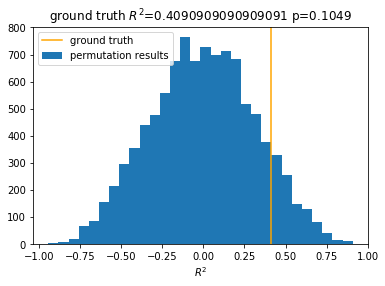

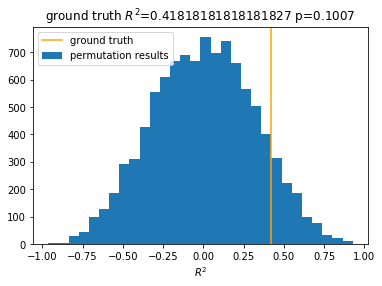

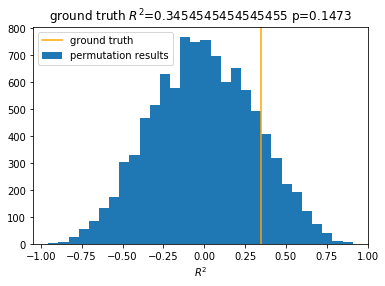

(0.3454545454545455, 0.1473)

In [48]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["SPOCXGB_r2_con"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["SPOCXGB_r2_ips"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["SPOCXGB_Mean"], True, r"$R^2$", 10000)

Text(0.5, 1.0, 'Correlation of SPOC XGB $R^2$ performances and number of movements\nECOG Con: $\\rho$=0.41 p=0.1\nECOG IPS: $\\rho$=0.42, p=0.1\nMean ECOG Con and Ips: $\\rho$=0.34, p=0.14')

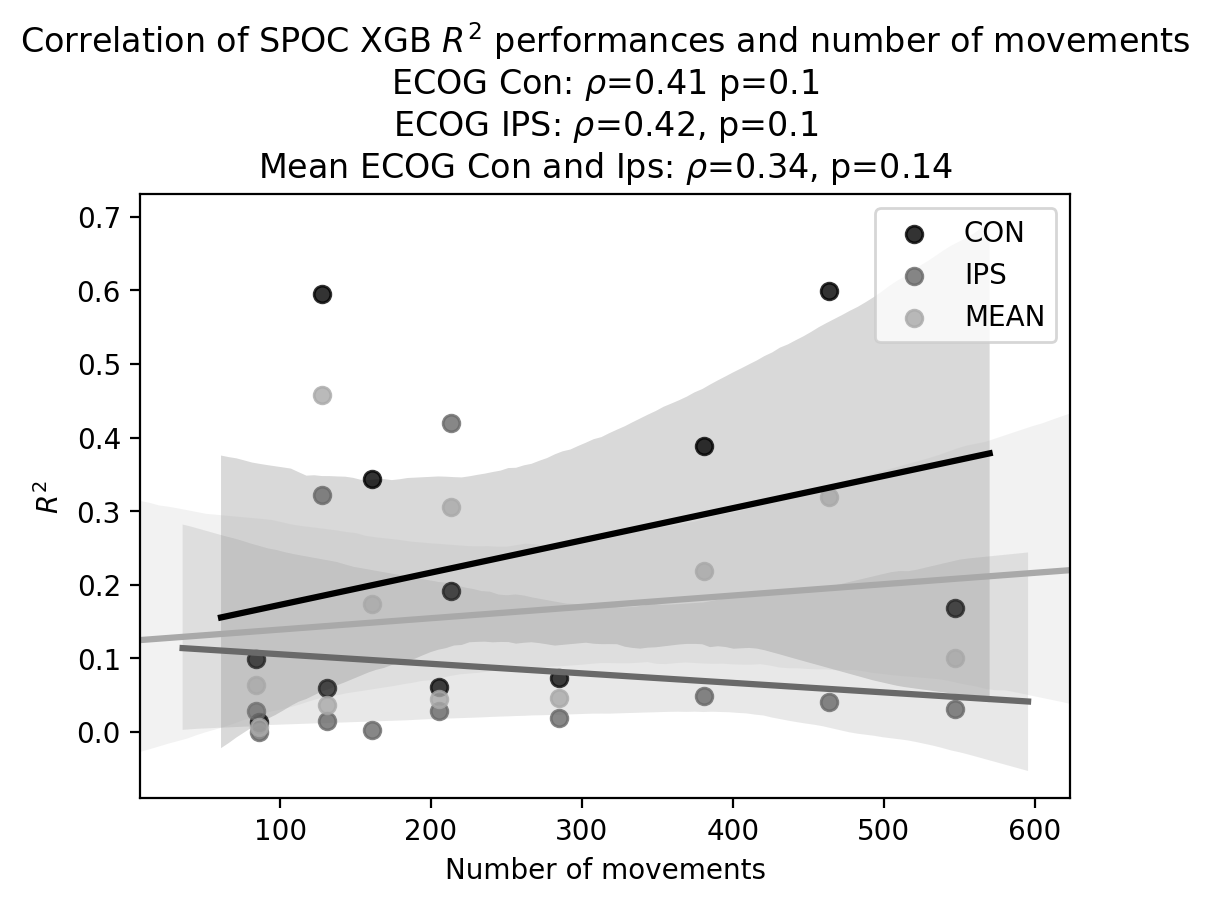

In [51]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="SPOCXGB_r2_con", data=df_mov_comp, color="black", label="CON")
sns.regplot(x="movs", y="SPOCXGB_r2_ips", data=df_mov_comp, color="dimgrey", label="IPS")
sns.regplot(x="movs", y="SPOCXGB_Mean", data=df_mov_comp, color="darkgray", label="MEAN")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of SPOC XGB "r"$R^2$"+" performances and number of movements\n"+\
          "ECOG Con: "+r"$\rho$"+"=0.41 p=0.1" +
          "\nECOG IPS: "+r"$\rho$"+"=0.42, p=0.1\n"+\
         "Mean ECOG Con and Ips: "+r"$\rho$"+"=0.34, p=0.14")

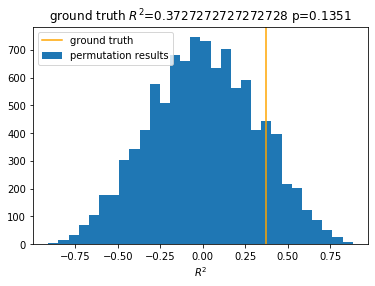

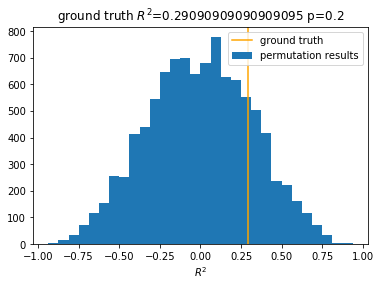

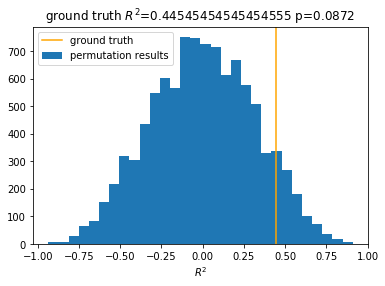

(0.44545454545454555, 0.0872)

In [53]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["LM_r2_con"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["LM_r2_ips"], True, r"$R^2$", 10000)
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["LM_Mean"], True, r"$R^2$", 10000)

Text(0.5, 1.0, 'Correlation of LM $R^2$ performances and number of movements\nECOG Con: $\\rho$=0.37 p=0.14\nECOG IPS: $\\rho$=0.29, p=0.2\nMean ECOG Con and Ips: $\\rho$=0.44, p=0.09')

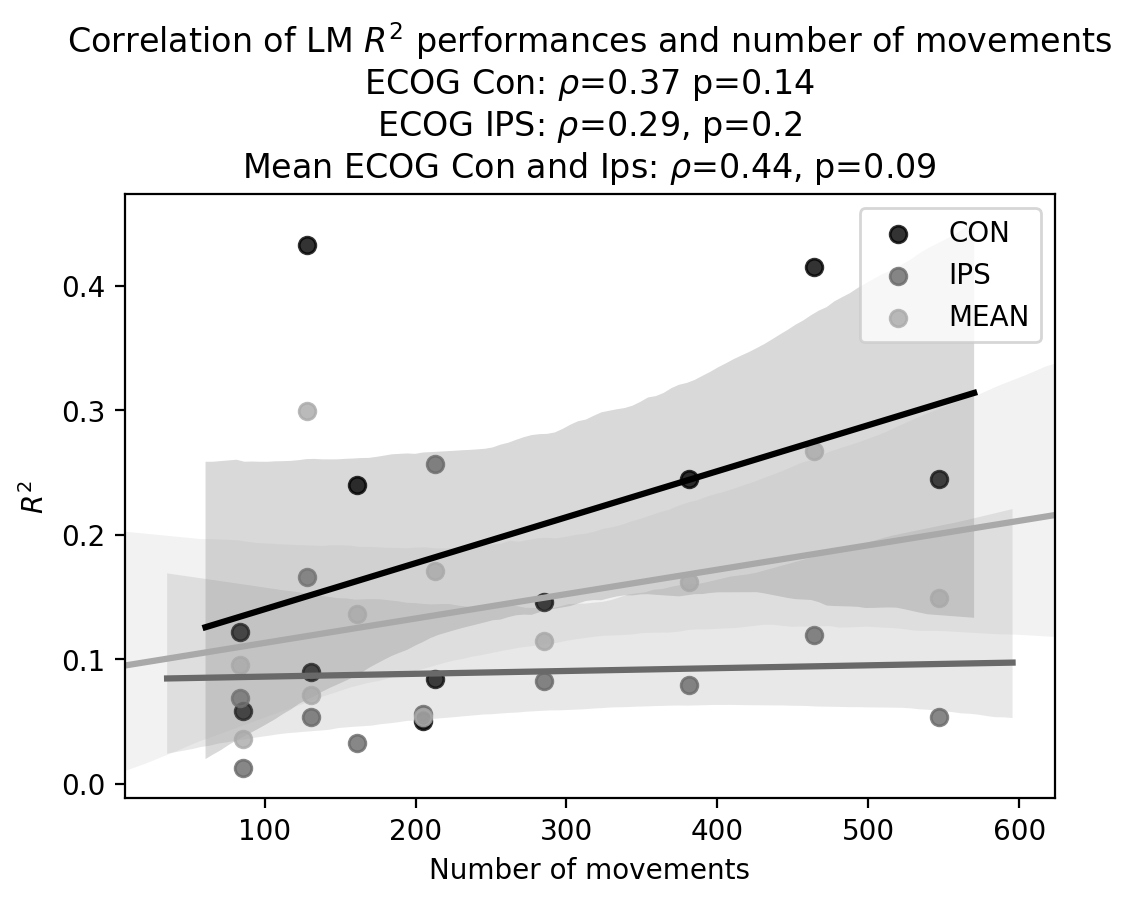

In [54]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="LM_r2_con", data=df_mov_comp, color="black", label="CON")
sns.regplot(x="movs", y="LM_r2_ips", data=df_mov_comp, color="dimgrey", label="IPS")
sns.regplot(x="movs", y="LM_Mean", data=df_mov_comp, color="darkgray", label="MEAN")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of LM "r"$R^2$"+" performances and number of movements\n"+\
          "ECOG Con: "+r"$\rho$"+"=0.37 p=0.14" +
          "\nECOG IPS: "+r"$\rho$"+"=0.29, p=0.2\n"+\
         "Mean ECOG Con and Ips: "+r"$\rho$"+"=0.44, p=0.09")

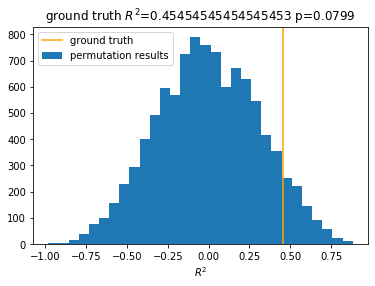

(0.45454545454545453, 0.0799)

In [8]:
icn_permutation_test.permutationTestSpearmansRho(movs, res_XGB["ECOG_CON"], True, r"$R^2$", 10000)

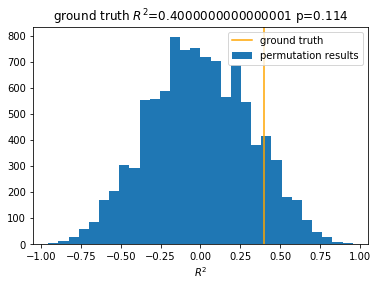

(0.4000000000000001, 0.114)

In [113]:
icn_permutation_test.permutationTestSpearmansRho(movs, res_XGB["ECOG_IPS"], True, r"$R^2$", 10000)

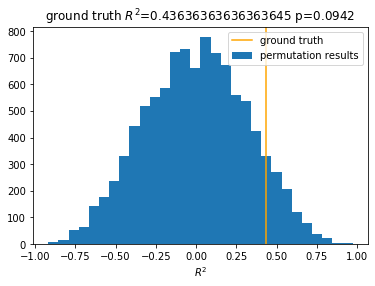

(0.43636363636363645, 0.0942)

In [114]:
icn_permutation_test.permutationTestSpearmansRho(movs, np.array([res_XGB["ECOG_CON"], res_XGB["ECOG_IPS"]]).mean(axis=0)
                                                 , True, r"$R^2$", 10000)

In [103]:
stats.spearmanr(res_XGB["ECOG_CON"], movs)

SpearmanrResult(correlation=0.45454545454545453, pvalue=0.16014543725525882)

In [104]:
stats.spearmanr(res_XGB["ECOG_IPS"], movs)

SpearmanrResult(correlation=0.4000000000000001, pvalue=0.22286835013352002)

In [111]:
stats.spearmanr(np.array([res_XGB["ECOG_CON"], res_XGB["ECOG_IPS"]]).mean(axis=0), movs)

SpearmanrResult(correlation=0.43636363636363645, pvalue=0.1796648765800112)

In [25]:
df_mov_comp = pd.DataFrame()
df_mov_comp["r2_con"] = res_XGB["ECOG_CON"]
df_mov_comp["r2_ips"] = res_XGB["ECOG_IPS"]
df_mov_comp["r2_con_STN"] = res_XGB["STN_CON"]
df_mov_comp["r2_ips_STN"] = res_XGB["STN_IPS"]
df_mov_comp["r2_mean_CON_ECOGSTN"] = np.array([res_XGB["ECOG_CON"], res_XGB["STN_CON"]]).mean(axis=0)
df_mov_comp["r2_mean_IPS_ECOGSTN"] = np.array([res_XGB["ECOG_IPS"], res_XGB["STN_IPS"]]).mean(axis=0)
df_mov_comp["r2_mean_ALL_ECOGSTN"] = np.array([res_XGB["ECOG_CON"], res_XGB["ECOG_IPS"], 
                                               res_XGB["STN_CON"], res_XGB["STN_IPS"]]).mean(axis=0)

df_mov_comp["movs"] = movs

Text(0.5, 1.0, 'Correlation of $R^2$ performances and number of movements\nECOG Con: $\\rho$=0.45 p=0.08 ECOG IPS: $\\rho$=0.4, p=0.114\nMean ECOG Con and Ips: $\\rho$=0.436, p=0.09')

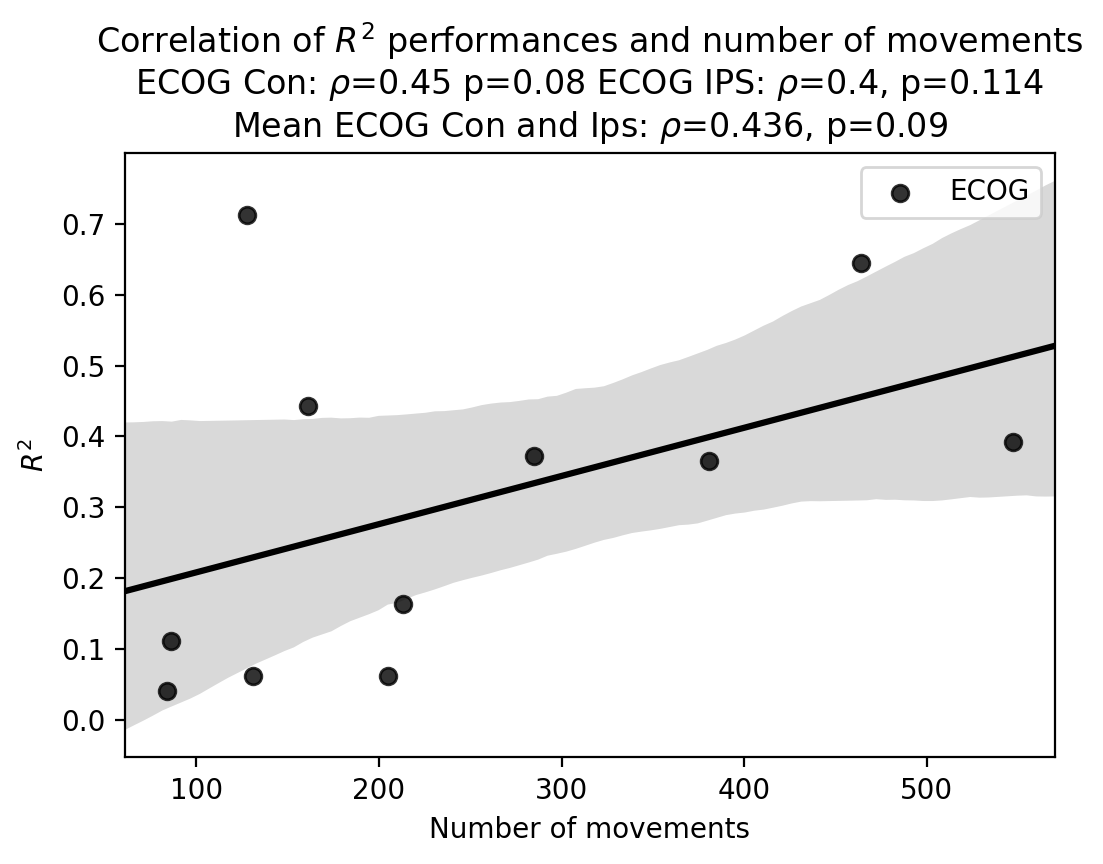

In [11]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="r2_con", data=df_mov_comp, color="black", label="ECOG")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of "r"$R^2$"+" performances and number of movements\n"+\
          "ECOG Con: "+r"$\rho$"+"=0.45 p=0.08" +" ECOG IPS: "+r"$\rho$"+"=0.4, p=0.114\n"+\
         "Mean ECOG Con and Ips: "+r"$\rho$"+"=0.436, p=0.09")

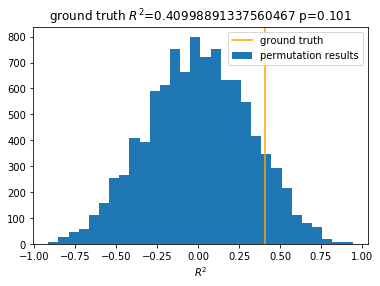

(0.40998891337560467, 0.101)

In [13]:
icn_permutation_test.permutationTestSpearmansRho(movs, res_XGB["STN_CON"], True, r"$R^2$", 10000)

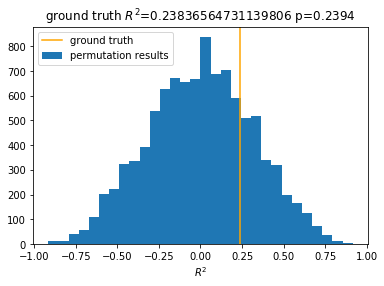

(0.23836564731139806, 0.2394)

In [14]:
icn_permutation_test.permutationTestSpearmansRho(movs, res_XGB["STN_IPS"], True, r"$R^2$", 10000)

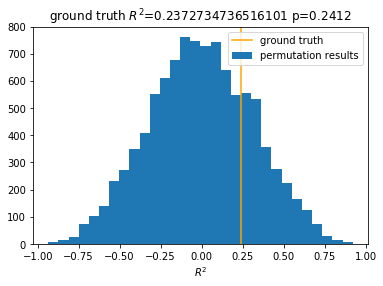

(0.2372734736516101, 0.2412)

In [16]:
icn_permutation_test.permutationTestSpearmansRho(movs, np.array([res_XGB["STN_CON"], res_XGB["STN_IPS"]]).mean(axis=0)
                                                 , True, r"$R^2$", 10000)

In [17]:
stats.spearmanr(res_XGB["STN_CON"], movs)

SpearmanrResult(correlation=0.40998891337560467, pvalue=0.21044540157102568)

In [18]:
stats.spearmanr(res_XGB["STN_IPS"], movs)

SpearmanrResult(correlation=0.23836564731139806, pvalue=0.4802862963401572)

In [15]:
stats.spearmanr(np.array([res_XGB["STN_CON"], res_XGB["STN_IPS"]]).mean(axis=0), movs)

SpearmanrResult(correlation=0.2372734736516101, pvalue=0.48236033393909294)

Text(0.5, 1.0, 'Correlation of $R^2$ performances and number of movements\nSTN Con: $\\rho$=0.41 p=0.1 STN IPS: $\\rho$=0.23, p=0.24\nMean STN Con and Ips: $\\rho$=0.24, p=0.24')

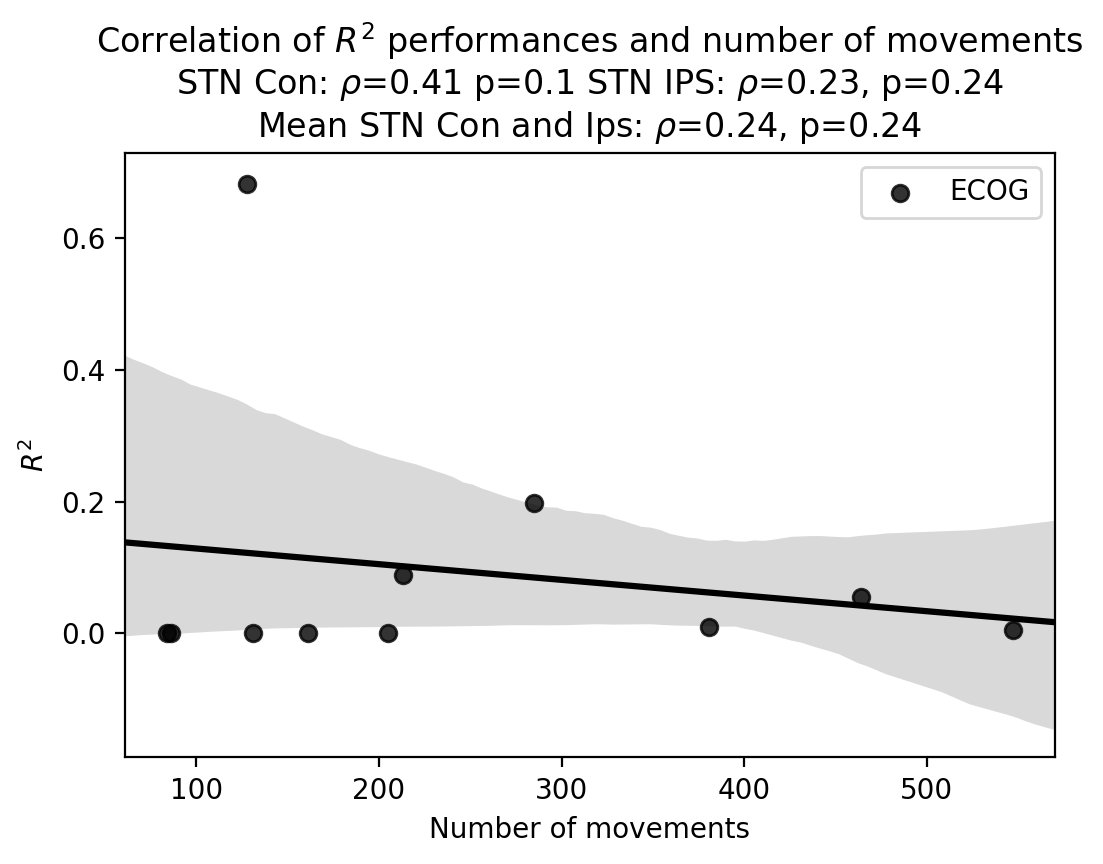

In [20]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="r2_con_STN", data=df_mov_comp, color="black", label="ECOG")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of "r"$R^2$"+" performances and number of movements\n"+\
          "STN Con: "+r"$\rho$"+"=0.41 p=0.1" +" STN IPS: "+r"$\rho$"+"=0.23, p=0.24\n"+\
         "Mean STN Con and Ips: "+r"$\rho$"+"=0.24, p=0.24")

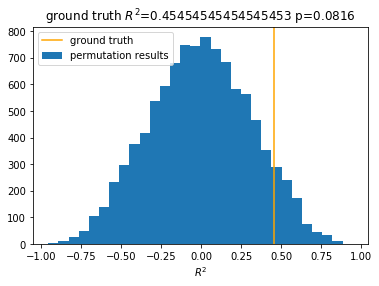

(0.45454545454545453, 0.0816)

In [24]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["r2_mean_ECOGSTN"], True, r"$R^2$", 10000)

In [27]:
stats.spearmanr(np.array(df_mov_comp["r2_mean_CON_ECOGSTN"]), movs)

SpearmanrResult(correlation=0.45454545454545453, pvalue=0.16014543725525882)

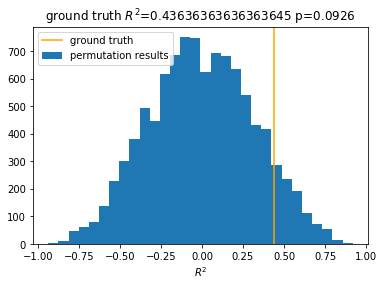

(0.43636363636363645, 0.0926)

In [29]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["r2_mean_IPS_ECOGSTN"], True, r"$R^2$", 10000)

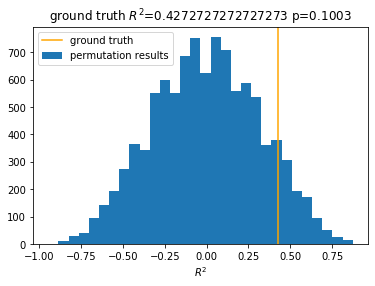

(0.4272727272727273, 0.1003)

In [31]:
icn_permutation_test.permutationTestSpearmansRho(movs, df_mov_comp["r2_mean_ALL_ECOGSTN"], True, r"$R^2$", 10000)

Text(0.5, 1.0, 'Correlation of $R^2$ performances and number of movements\nMean ECOG STN Con: $\\rho$=0.45 p=0.08 Mean ECOG STN Ips: $\\rho$=0.43, p=0.09\nMean ECOG STN Con and Ips: $\\rho$=0.42, p=0.1')

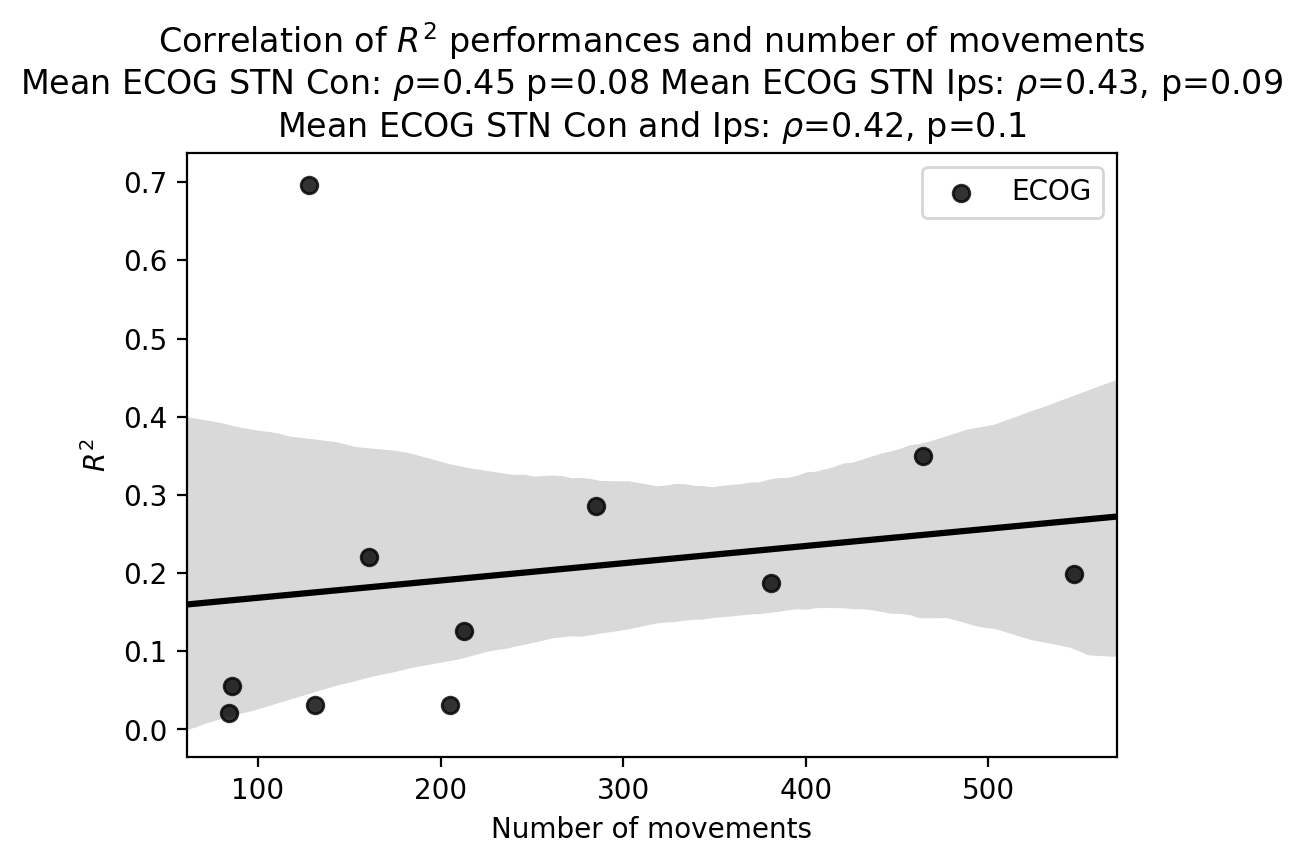

In [32]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="movs", y="r2_mean_CON_ECOGSTN", data=df_mov_comp, color="black", label="ECOG")
plt.legend()
plt.xlabel("Number of movements")
plt.ylabel("$R^2$")
plt.title("Correlation of "r"$R^2$"+" performances and number of movements\n"+\
          "Mean ECOG STN Con: "+r"$\rho$"+"=0.45 p=0.08" +" Mean ECOG STN Ips: "+r"$\rho$"+"=0.43, p=0.09\n"+\
         "Mean ECOG STN Con and Ips: "+r"$\rho$"+"=0.42, p=0.1")